In [1]:
import trackintel as ti
pfs = ti.io.file.read_positionfixes_csv('pfs.csv', index_col='ID')
sp = ti.io.file.read_staypoints_csv('staypoints.csv', index_col='id')
tpls = ti.io.file.read_triplegs_csv('triplegs.csv', index_col='id')

/usr/local/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/trackintel/io/file.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/

In [2]:
# Generate locations from the staypoints.
new_sp, locs = ti.preprocessing.staypoints.generate_locations(staypoints=sp, method='dbscan', epsilon=100, num_samples=3, agg_level='user')

/usr/local/lib/python3.9/site-packages/trackintel/geogr/distances.py:227: UserWarning: The CRS of your data is not defined.
  warnings.warn("The CRS of your data is not defined.")
/usr/local/lib/python3.9/site-packages/pygeos/io.py:89: UserWarning: The shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the PyGEOS GEOS version (3.10.4-CAPI-1.16.2). Conversions between both will be slow
  warnings.warn(


In [3]:
new_sp

,user_id,started_at,finished_at,geom,location_id
id,,,,,
0,0,2022-09-07 20:36:01-04:00,2022-09-07 21:21:37-04:00,POINT (-81.72430 30.31220),<NA>
1,0,2022-09-20 14:10:57-04:00,2022-09-20 14:13:46-04:00,POINT (-81.75290 30.27120),0
2,0,2022-09-20 14:16:49-04:00,2022-09-20 23:40:41-04:00,POINT (-81.82171 30.28510),1
3,0,2022-09-20 23:40:41-04:00,2022-09-20 23:47:54-04:00,POINT (-81.75290 30.27120),0
4,0,2022-09-20 23:51:20-04:00,2022-09-21 01:32:10-04:00,POINT (-81.67558 30.36497),2
...,...,...,...,...,...
671785,5171,2022-10-28 22:25:22-04:00,2022-10-28 22:30:26-04:00,POINT (-81.74800 30.20161),36842
671786,5171,2022-10-28 22:32:17-04:00,2022-10-28 23:43:58-04:00,POINT (-81.74847 30.20290),36842
671787,5171,2022-10-28 23:43:58-04:00,2022-10-28 23:48:20-04:00,POINT (-81.76864 30.14110),<NA>


In [6]:
locs

,user_id,center,extent
id,,,
0,0,POINT (-81.75290 30.27120),"POLYGON ((-81.75388 30.27154, -81.75384 30.271..."
1,0,POINT (-81.82170 30.28510),"POLYGON ((-81.82170 30.28614, -81.82160 30.286..."
2,0,POINT (-81.67558 30.36497),"POLYGON ((-81.67453 30.36497, -81.67454 30.364..."
3,0,POINT (-81.60281 30.19179),"POLYGON ((-81.60282 30.19178, -81.60281 30.191..."
4,0,POINT (-81.66239 30.45000),"POLYGON ((-81.66240 30.45000, -81.66239 30.450..."
...,...,...,...
36838,5167,POINT (-81.68930 30.39580),"POLYGON ((-81.68930 30.39580, -81.68929 30.395..."
36839,5168,POINT (-81.75290 30.27120),"POLYGON ((-81.75186 30.27120, -81.75186 30.271..."
36840,5170,POINT (-81.58730 30.36680),"POLYGON ((-81.58729 30.36680, -81.58730 30.366..."


In [7]:
# Write locations to csv file.
locs.as_locations.to_csv('location.csv')

In [8]:
pfs

,id,tracked_at,user_id,staypoint_id,tripleg_id,geom
ID,,,,,,
0,0015b634-5297-31bb-8e29-e54f3405b9ce,2022-09-07 20:28:01-04:00,0,NaN,0.0,POINT (-81.58150 30.27550)
1,0015b634-5297-31bb-8e29-e54f3405b9ce,2022-09-07 20:28:02-04:00,0,NaN,0.0,POINT (-81.72430 30.31220)
2,0015b634-5297-31bb-8e29-e54f3405b9ce,2022-09-07 20:28:32-04:00,0,NaN,0.0,POINT (-81.58150 30.27550)
3,0015b634-5297-31bb-8e29-e54f3405b9ce,2022-09-07 20:28:33-04:00,0,NaN,0.0,POINT (-81.72430 30.31220)
4,0015b634-5297-31bb-8e29-e54f3405b9ce,2022-09-07 20:29:06-04:00,0,NaN,0.0,POINT (-81.58150 30.27550)
...,...,...,...,...,...,...
5837295,b53fe8fa-9e3d-301f-9b66-65e7d3b52190,2022-10-29 17:36:49-04:00,5171,671789.0,NaN,POINT (-81.97047 30.29001)
5837228,b53fe8fa-9e3d-301f-9b66-65e7d3b52190,2022-10-30 00:19:09-04:00,5171,NaN,152109.0,POINT (-81.73973 30.20432)
5837229,b53fe8fa-9e3d-301f-9b66-65e7d3b52190,2022-10-30 00:19:59-04:00,5171,NaN,152109.0,POINT (-81.73973 30.20431)


In [9]:
id_counts = pfs['user_id'].value_counts()

# Limit the count between 20000 and 30000
id_counts_filtered = id_counts[(id_counts >= 20000) & (id_counts <= 30000)]


In [10]:
# Find the user_id with the most occurrences and Visualization.
top_id = pfs['user_id'].value_counts().idxmax()
pfs_top = pfs.loc[pfs['user_id'] == top_id]
sp_top = new_sp.loc[new_sp['user_id'] == top_id]
locs_top = locs.loc[locs['user_id'] == top_id]

In [11]:
pfs_top

,id,tracked_at,user_id,staypoint_id,tripleg_id,geom
ID,,,,,,
716625,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-09-05 00:05:40-04:00,1716,274960.0,NaN,POINT (-81.77254 30.32351)
716626,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-09-05 00:16:03-04:00,1716,274961.0,NaN,POINT (-81.81001 30.36001)
716627,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-09-05 00:49:34-04:00,1716,274962.0,NaN,POINT (-81.81369 30.35877)
716628,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-09-05 00:49:43-04:00,1716,274962.0,NaN,POINT (-81.81369 30.35878)
716629,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-09-05 00:51:13-04:00,1716,274962.0,NaN,POINT (-81.81341 30.35836)
...,...,...,...,...,...,...
5366973,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-10-31 23:41:45-04:00,1716,279061.0,NaN,POINT (-81.81354 30.35846)
5366974,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-10-31 23:46:10-04:00,1716,279061.0,NaN,POINT (-81.81344 30.35846)
5366975,c36d3642-dad9-3efe-87f1-883da9bf3423,2022-10-31 23:46:25-04:00,1716,279061.0,NaN,POINT (-81.81343 30.35845)


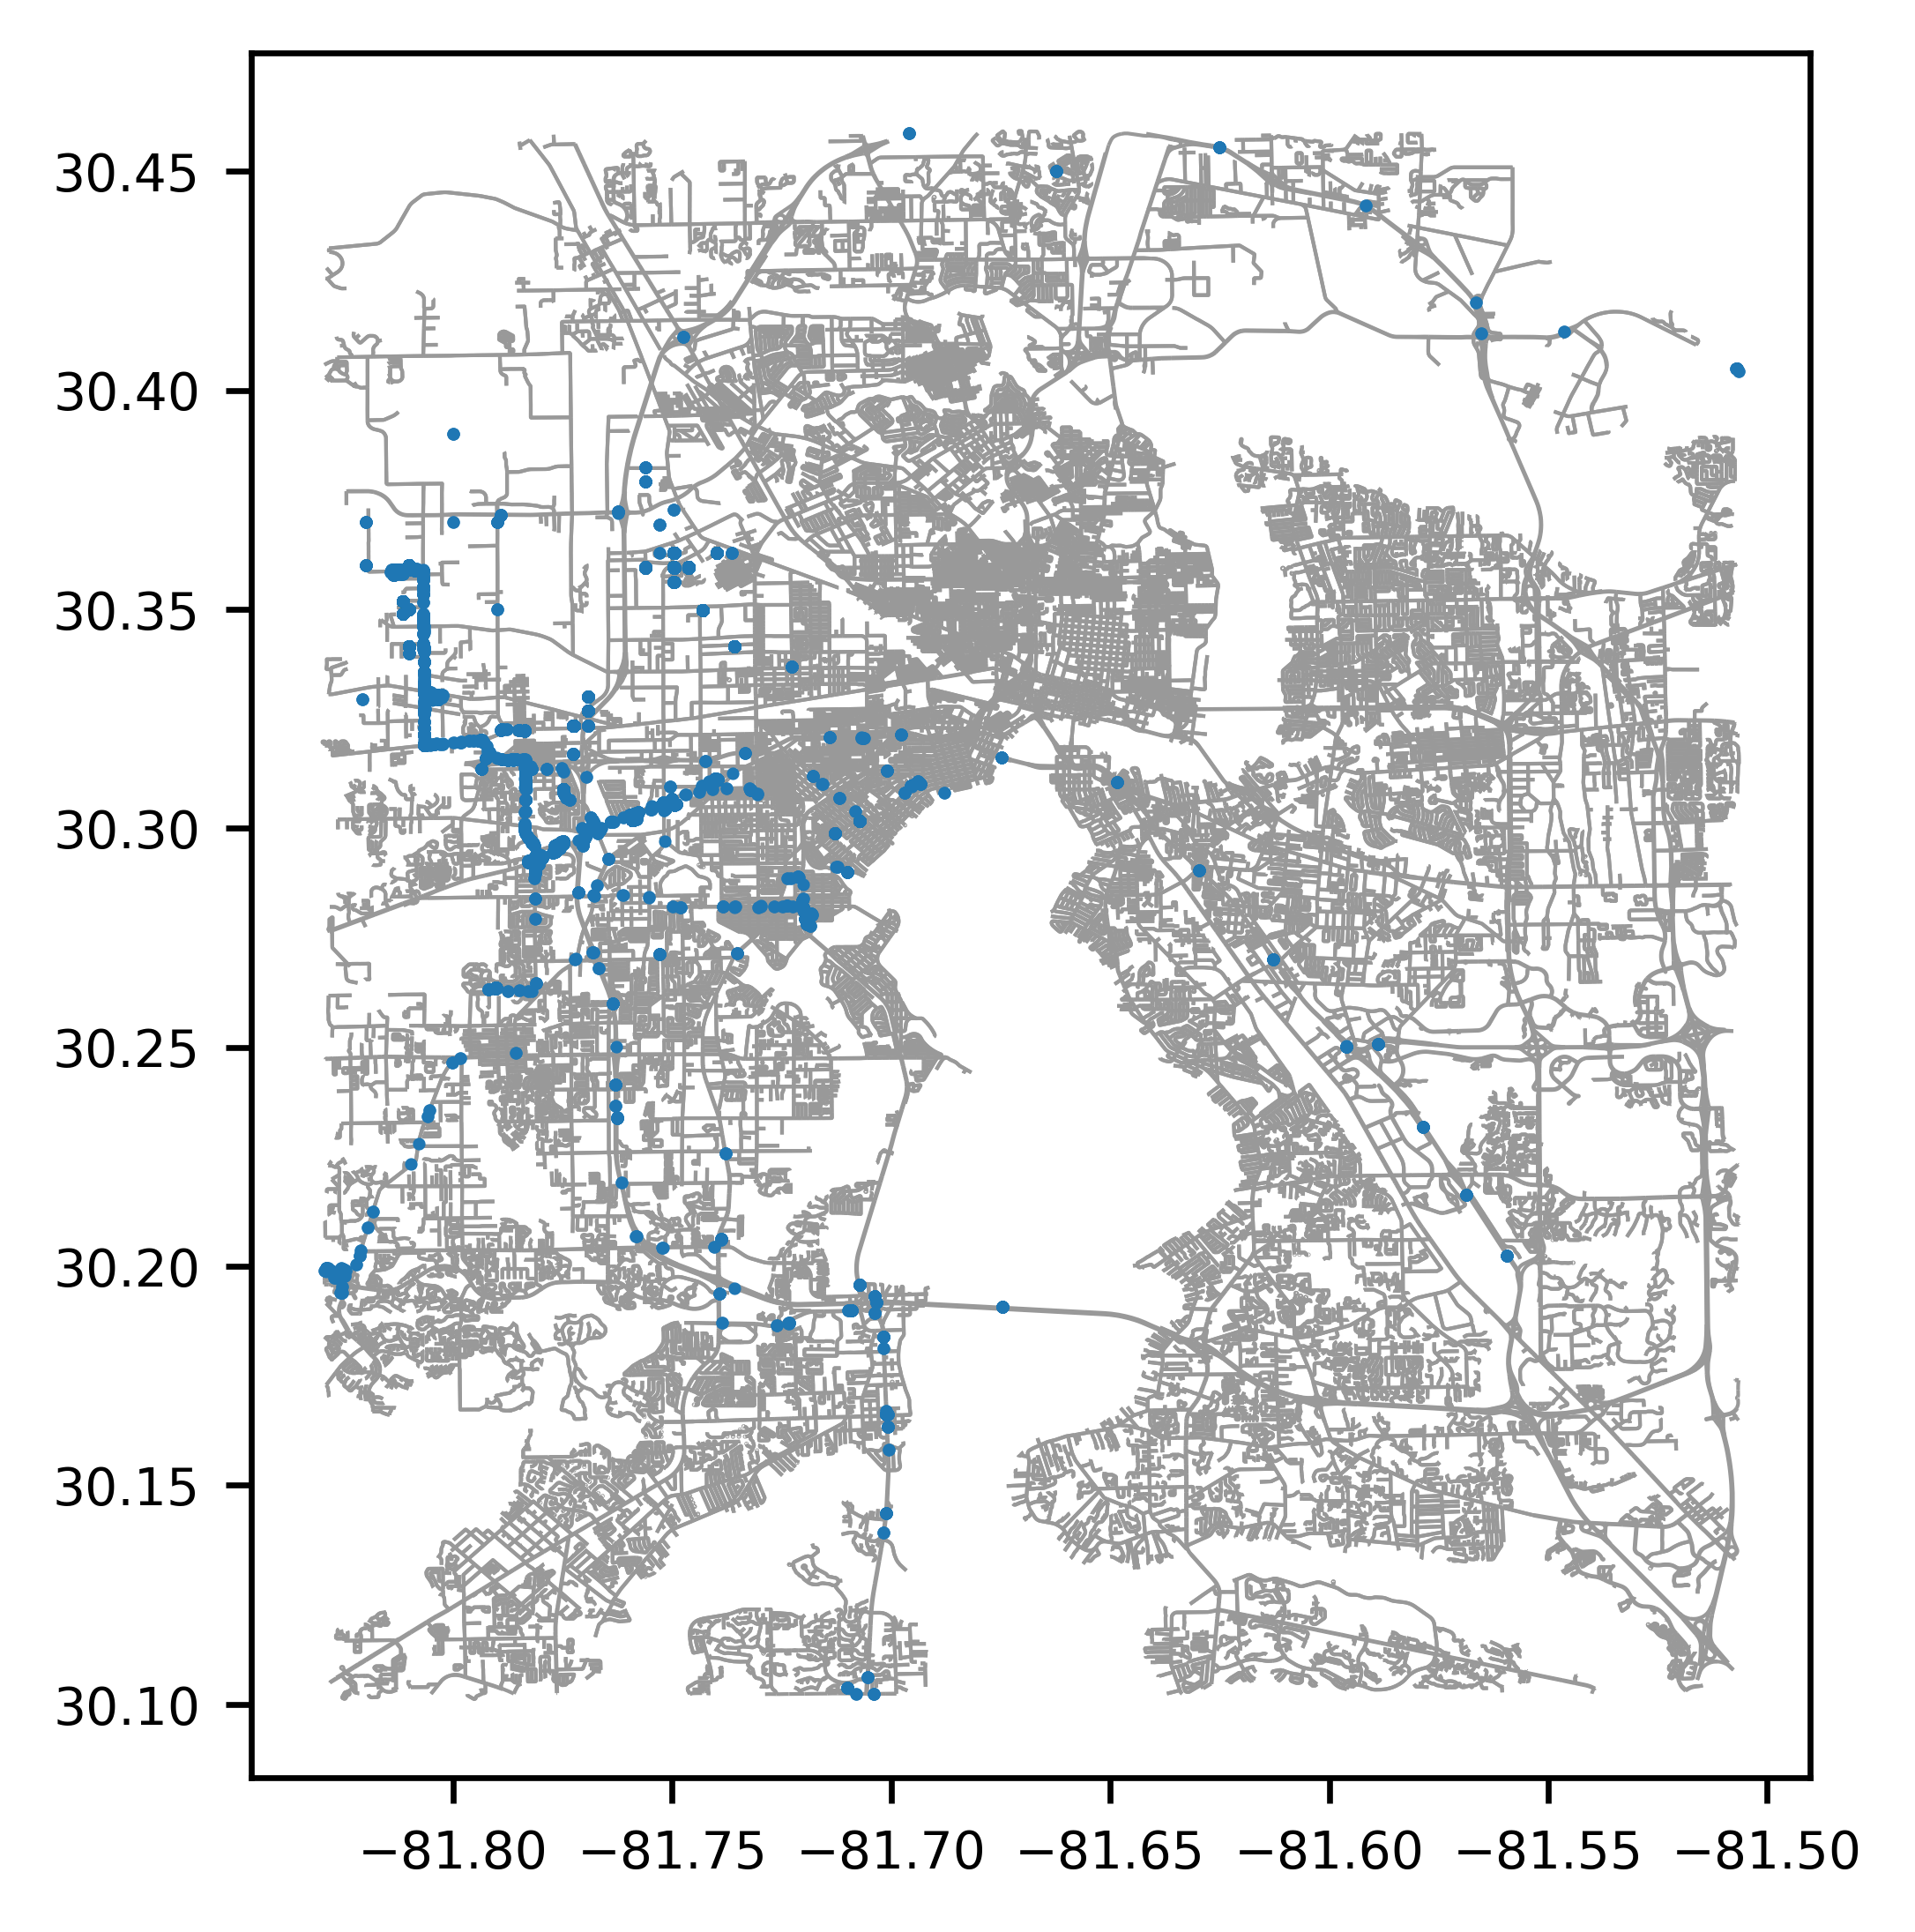

In [12]:
# Plots positionfixes
pfs_top.as_positionfixes.plot(plot_osm=True)

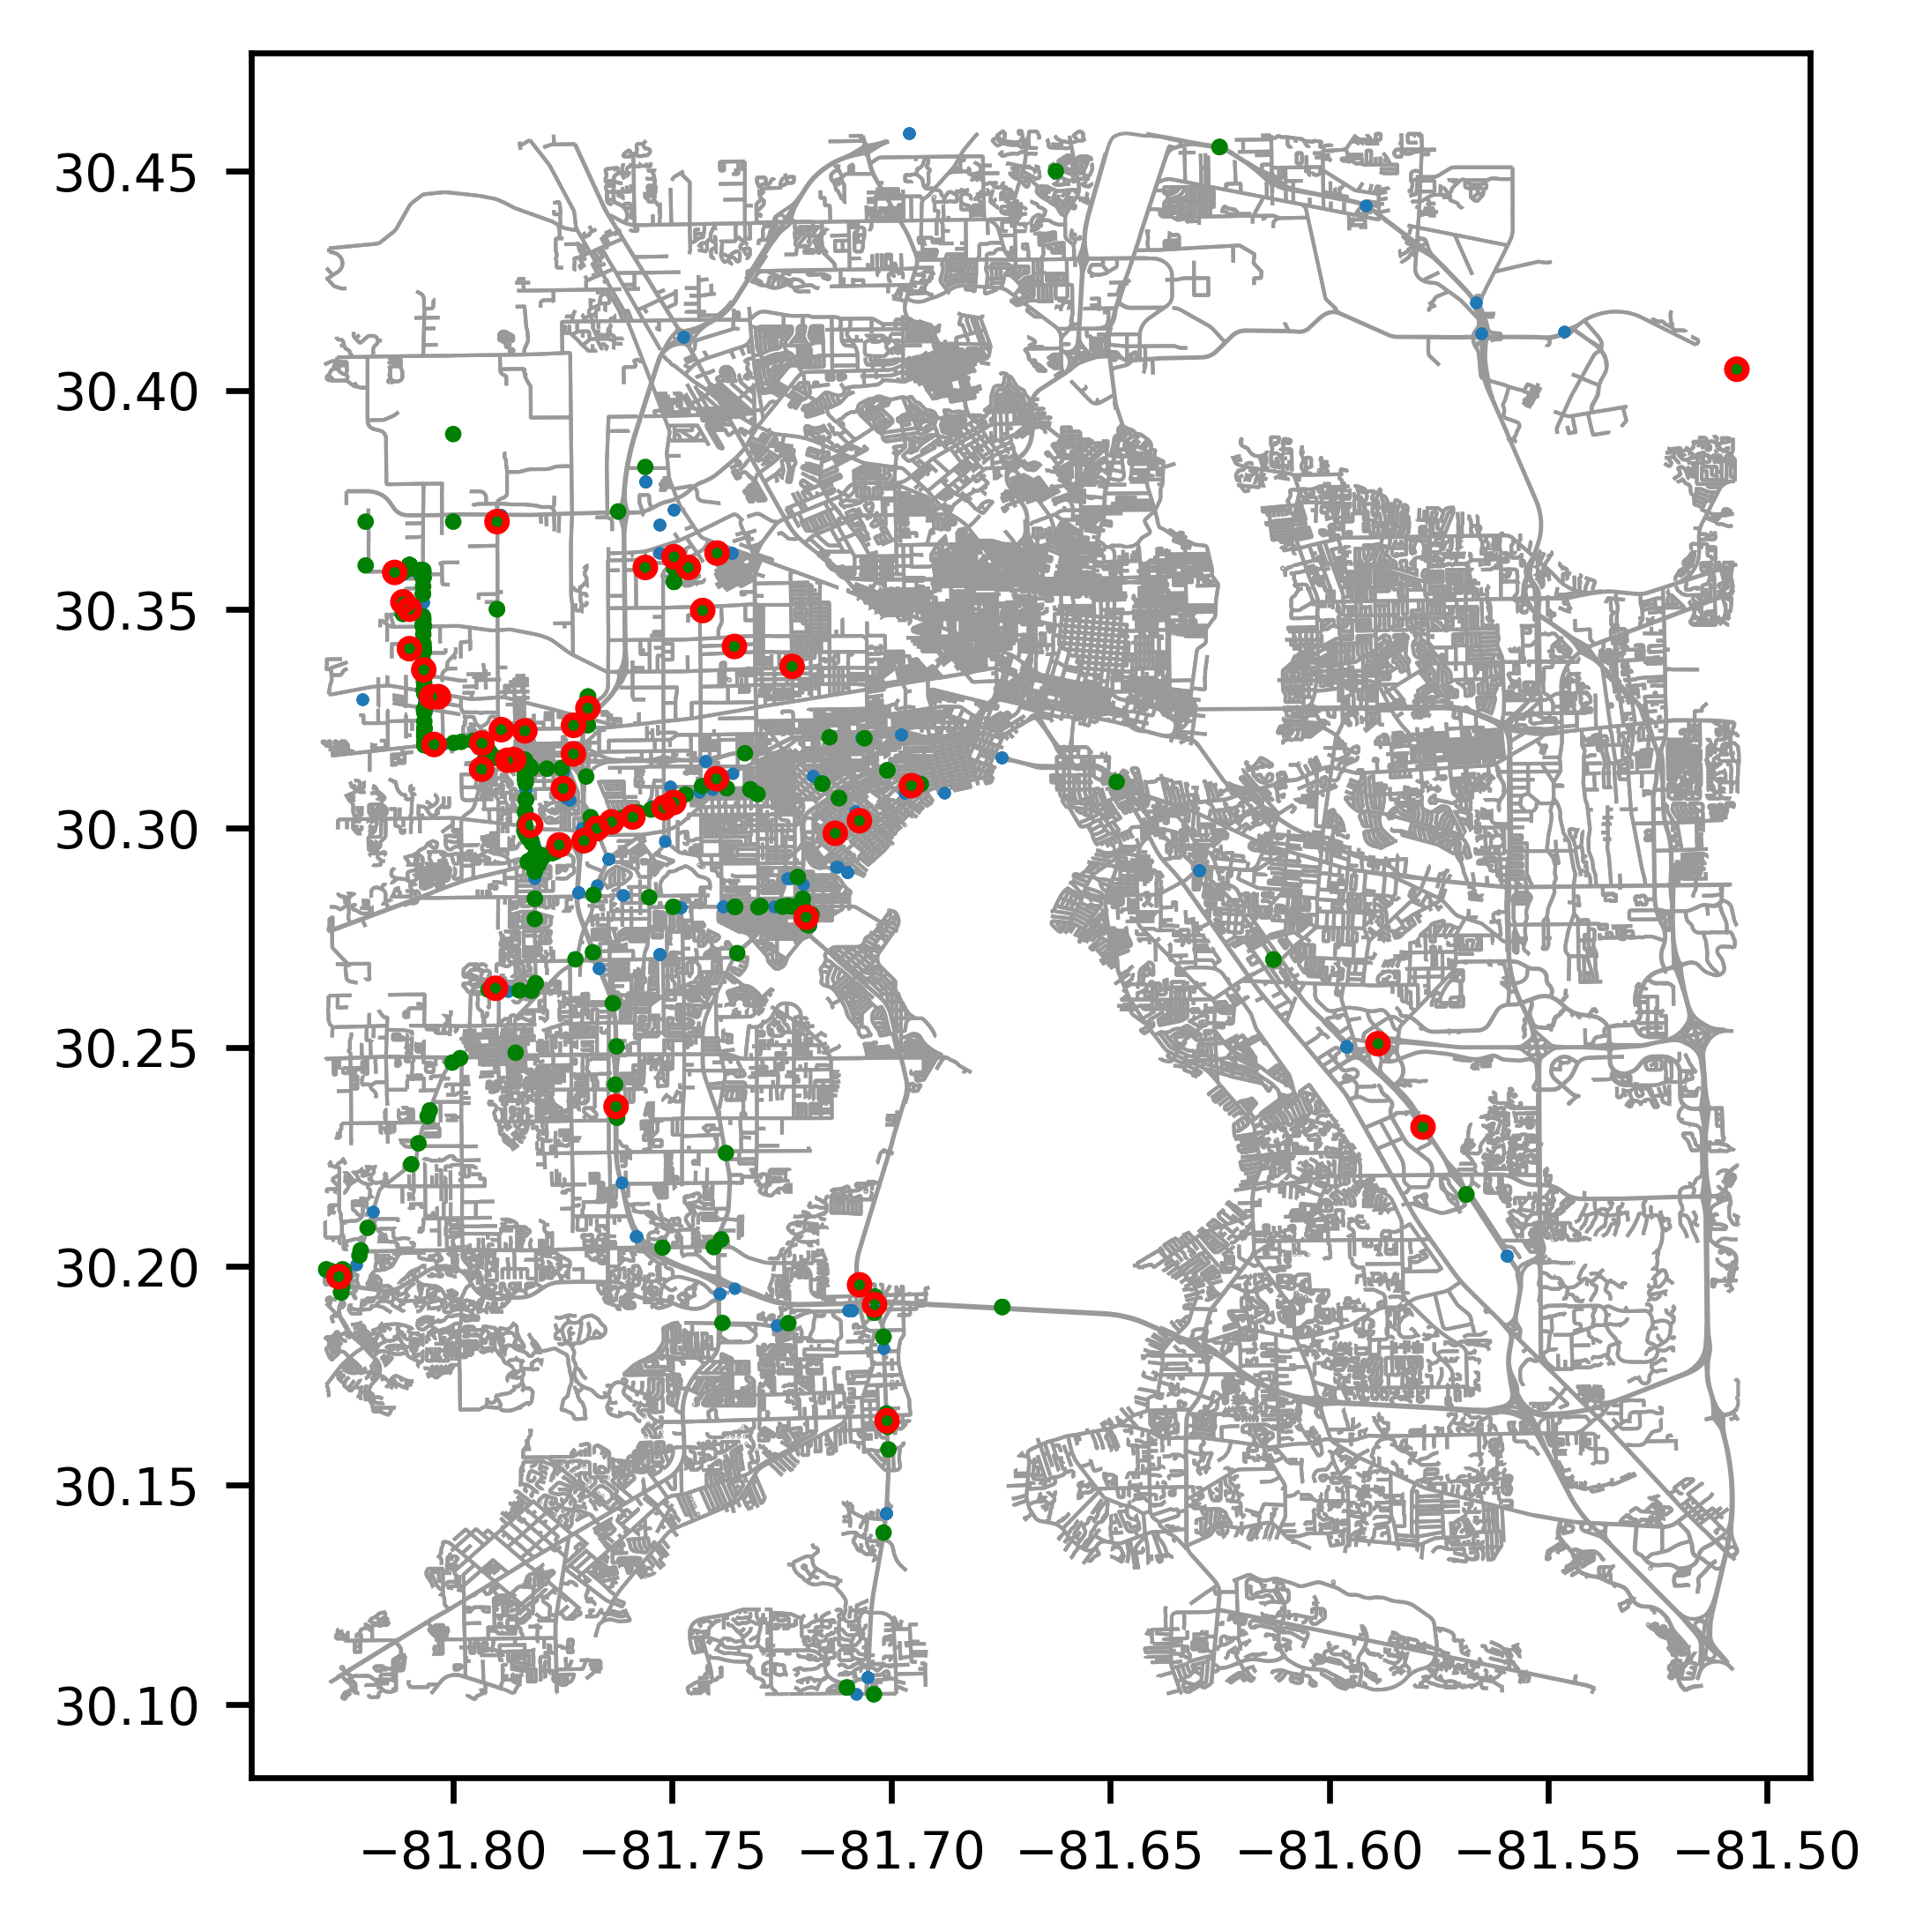

In [13]:
locs_top.as_locations.plot(radius=200, positionfixes=pfs_top, staypoints=sp_top, plot_osm=True)